# **Classification and Regression case (Wine Dataset)**

**Authors:**
* FOZAME ENDEZOUMOU Armand Bryan
* Jessica MBOUNKAP
* Maheni SOUMAH
* LEUMALEU MBOUYOM Arnold Vianey
* William TOWA Darryl KENGNE

---

This project is the very first of the Machine Learning project given by **Dr Souhail Hanoune**. In this project we have as a challenge:
* Manipulate and associate different datasets and draw conclusions
* classification and regression on the Wine dataset.

## Business Understanding

<p>Making wine is an art, a complete story. Crafting good wine requires an in-depth study known as oenology, the science dedicated to the study and knowledge of wines. The sale of wine constitutes a vast market and can prove to be a powerful element for a robust economy. The importance of knowing how to produce good wine is paramount.</p>

<p>Unfortunately, in certain regions of the world, we observe an increasing presence of wines of very poor quality in the market. This has a detrimental effect on the economic trend of wine in the market and can lead to health issues such as the development of hepatitis, fatty liver, cirrhosis of the liver, and inflammation of the pancreas.</p>

<p>Generally, these regions are not monitored by competent authorities and do not undergo testing by oenologists to assess the quality of the wine. Taking on experts to assess wine quality would entail considerable expenses.</p>

<p>Considering these drawbacks, we will implement an intelligent system capable of classifying the type of wine (red or white) and evaluating the quality of the wine based on its chemical composition. We have datasets at our disposal, and we will establish this intelligent system.</p>

## Data Understanding

In [ ]:
#Mount disk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#basics librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from typing import Tuple, List
import pickle
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
#import datas
path_data = "/content/drive/MyDrive/Machine Learning project Aivancity/Datasets/wine/wine/wines_SPA.csv"
path_data2 = "/content/drive/MyDrive/Machine Learning project Aivancity/Datasets/wine/wine dataset.csv"
train = pd.read_csv(path_data)
train2 = pd.read_csv(path_data2)
print("Data load...")

Data load...


In [ ]:
seed = 123
np.random.seed(seed) #Set seed

In [ ]:
print('Shape data 1: {} and Shape data 2: {}'.format(train.shape, train2.shape))

Shape data 1: (7500, 11) and Shape data 2: (6497, 13)


In [ ]:
train.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [ ]:
train2.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


What we observe is that the two imported datasets do not have the same number of dimensions. One dataset has 11 dimensions, and the other has 13. This information simply indicates that we need to be vigilant when merging the data, and each dataset requires a thorough analysis before concatenation. Therefore, we will analyze the two datasets individually.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [ ]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


We observe that the two datasets contain different information, although they both serve our use cases. The "train2" dataset includes an additional column, "quality." The first dataset has many categorical variables. Additionally, both datasets have missing values.<br>
Let's move on to the statistical analysis by visualizing the mean, standard deviation, etc.

In [ ]:
#data1
train.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,7500.0,4.254933,0.118029,4.20,4.2,4.20,4.20,4.90
num_reviews,7500.0,451.109067,723.001856,25.00,389.0,404.00,415.00,32624.00
price,7500.0,60.095822,150.356676,4.99,18.9,28.53,51.35,3119.08
body,6331.0,4.158427,0.583352,2.00,4.0,4.00,5.00,5.00
acidity,6331.0,2.946612,0.248202,1.00,3.0,3.00,3.00,3.00


In [ ]:
#train2
train2.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [ ]:
print("We have {} wines and {} quality going to {} and {}".format(len(train2), len(np.unique(train2["quality"])), np.min(train2["quality"]), np.max(train2["quality"])))

We have 6497 wines and 7 quality going to 3 and 9


In [ ]:
print("Type of wine in the 1st dataset: \n {}".format(len(np.unique(train["wine"]))))

Type of wine in the 1st dataset: 
 847


In [ ]:
def plot_column_types(dataframe, title):
    column_types = dataframe.dtypes.value_counts()
    labels = column_types.index
    sizes = column_types.values

    fig, ax = plt.subplots(figsize=(5,3))
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff','#99ff99','#ffcc99','#ff6666'])

    # Draw a circle at the center of the pie to make it look like a donut
    centre_circle = plt.Circle((0,0),0.50,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle.
    ax.axis('equal')
    plt.tight_layout()
    plt.title(title)
    plt.show()


def bar_plot(df, col):
  """
  Plot barplot of interested categorical data
  """

  #retrieve data
  fig, ax = plt.subplots()
  df_obj = df[col].value_counts()
  df_values = df_obj.values
  df_labels = df_obj.index

  #get color
  cmap = plt.get_cmap("viridis")
  size = len(np.unique(df_values))
  colors = [cmap(i / size) for i in range(size)]

  #plot barplot
  ax.bar(df_labels,
         df_values,
         color=colors)
  ax.set_title("column {} and have {} unique values".format(col, size))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Fix locator for x-axis labels
  ax.xaxis.set_major_locator(FixedLocator(np.arange(len(df_labels))))


  plt.tight_layout()
  plt.show()

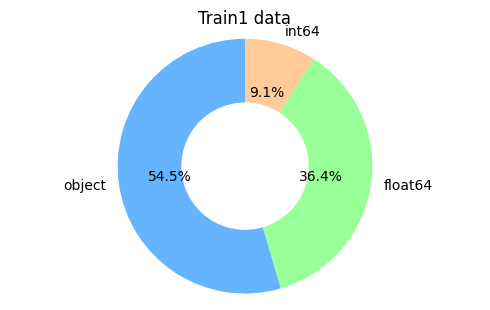

In [ ]:
plot_column_types(train, "Train1 data")

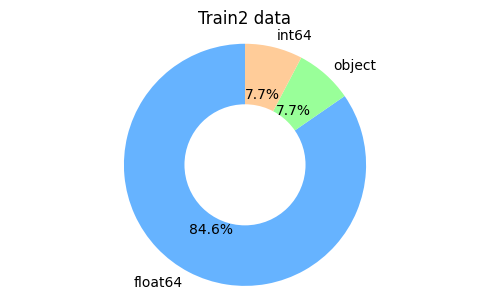

In [ ]:
plot_column_types(train2, "Train2 data")

For categorical variables, especially in the first dataset, we will perform <strong>One-Hot Encoding</strong>. One-Hot Encoding, also known as 1-of-$n$ encoding, involves encoding a variable with $n$ states into $n$ bits, with only one bit set to 1.

|Labels|FOZAME|ENDEZOUMOU|MAHENI
|-|-|-|-|
|FOZAME|1|0|0|
|ENDEZOUMOU|0|1|0|
|...|...|...|...|
|MAHENI|0|0|1|

<ipython-input-14-bc00de871cc4>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


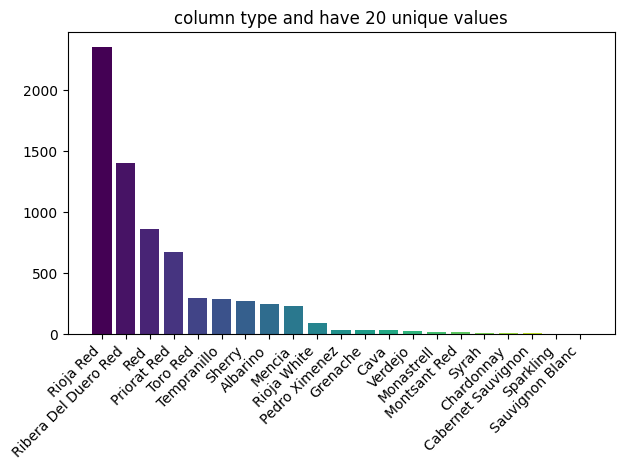

<ipython-input-14-bc00de871cc4>:42: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


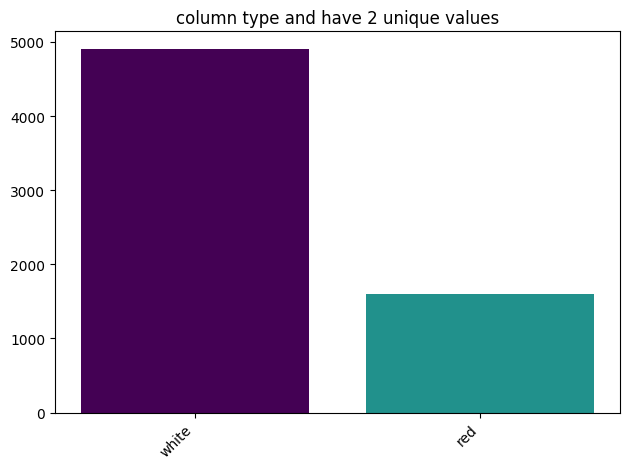

In [ ]:
bar_plot(train, col="type")
bar_plot(train2, col="type")

<p>Here are the "type" data for the first dataset. The categorical variable has multiple values. We are working on imbalanced target.</p>
<p>It represents a more detailed type of wine, whereas in dataset 2, we see that it is more general, either red wine or white wine.</p>
<p>In our case, do we need to specify the type of wine generally, or do we need more specific information? It would be ideal here to have more specific information.</p>

Visualize now missing values.

In [ ]:
def missing_val(data):
    """
    Determine rate of missing values in the dataset
    """

    miss_list = []
    cols = data.columns
    x = 0
    sum_data = data.shape[0]

    for col in cols:
        x = data[col].isnull().sum()
        rate = (x/sum_data)
        if rate != 0:
            print('{} col have missing val! Rate {} = {:.3f}'.format(col, col, rate))
            miss_list.append(col)

    miss_list.sort()
    print('\n','-'*25)
    print('\n Columns sorted:')
    print('-'*25)

    return miss_list

In [ ]:
print("TRAIN DATA 1")
missing_val(train)
print("="*50)
print("TRAIN DATA 2")
missing_val(train2)

TRAIN DATA 1
year col have missing val! Rate year = 0.000
type col have missing val! Rate type = 0.073
body col have missing val! Rate body = 0.156
acidity col have missing val! Rate acidity = 0.156

 -------------------------

 Columns sorted:
-------------------------
TRAIN DATA 2
fixed acidity col have missing val! Rate fixed acidity = 0.002
volatile acidity col have missing val! Rate volatile acidity = 0.001
citric acid col have missing val! Rate citric acid = 0.000
residual sugar col have missing val! Rate residual sugar = 0.000
chlorides col have missing val! Rate chlorides = 0.000
pH col have missing val! Rate pH = 0.001
sulphates col have missing val! Rate sulphates = 0.001

 -------------------------

 Columns sorted:
-------------------------


['chlorides',
 'citric acid',
 'fixed acidity',
 'pH',
 'residual sugar',
 'sulphates',
 'volatile acidity']

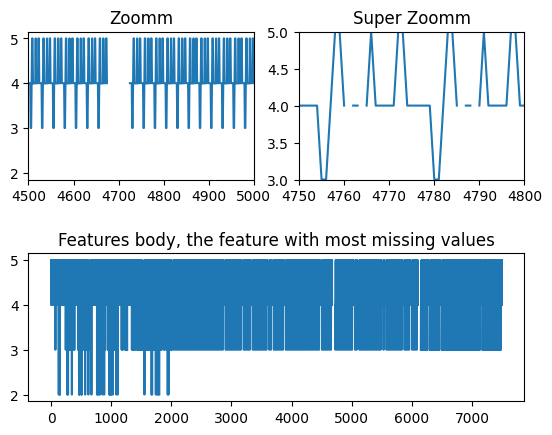

In [ ]:
ax1 = plt.subplot(212)
ax1.plot(train["body"])
ax1.set_title("Features body, the feature with most missing values")

ax2 = plt.subplot(221)
ax2.set_xlim(4500,5000)
ax2.plot(train["body"])
ax2.set_title("Zoomm")

ax3 = plt.subplot(222)
ax3.set_xlim(4750,4800)
ax3.set_ylim(3,5)
ax3.plot(train["body"])
ax3.set_title("Super Zoomm")

#Ajust space
plt.subplots_adjust(hspace=0.5)
plt.show()

We observe that the missing rate is not very significant as it does not even reach 1%. Therefore, for this operation, we will perform a polynomial or quadratic interpolation to estimate the missing values based on the other available values.

We use this technique because we don't have many missing values. Instead of simply removing the already present observations, it is preferable to perform an interpolation. We will use Newton's interpolation for this:

$$P_n(x) = \sum_{i=0}^{n} β_iw_i(x)$ with $w_i(x) = \prod_{j=0}^{i-1} (x-x_j), \forall i \in [1,..,n]$ and $w_0(x) = 1$$

Now let's check outliers.



We will use the Interquartile Range (IQR) method here to identify outliers in the dataset. Outliers can introduce bias into the model and result in poor scores, which is why it is crucial to identify them.

Let $q1$ and $q3$ be the first quartile and the third quartile, respectively. Then, the Interquartile Range (IQR) is defined as $IQR = q3 - q1$. <br>


\begin{cases}
    \text{Outliers, if } x = q1 - 1.5 \times IQR \text{ or } x = q3 + 1.5 \times IQR \\
    \text{No outlier, else}
\end{cases}


In [ ]:
def plot_boxplots(*args, x=8, y=5, title="Boxplots with Outliers"):
    """
    Plot boxplot for the data
    """

    plt.figure(figsize=(x, y))
    for df in args:
        df.boxplot(rot=45)
    plt.title(title)
    plt.show()
    print('Shape: {}'.format(df.shape))


def IQR(X, plot_boxplots, only_outlier=True):
    '''
    Return rate of outlier in the data
    '''
    columns = X.columns
    for col in columns:
        # Vérifier le type de données
        if pd.api.types.is_numeric_dtype(X[col]):
            X[col] = pd.to_numeric(X[col])
            compteur = 0
            #compute IQR
            q1 = np.quantile(X[col], 0.25)
            q3 = np.quantile(X[col], 0.75)
            iqr = q3 - q1
            verif1 = q1 - (1.5*iqr)
            verif2 = q3 + (1.5*iqr)
            shapes = len(X)
            A = X[col]
            for i in range(shapes):
                if A[i] < verif1:
                    compteur=compteur+1
                elif A[i] > verif2:
                    compteur = compteur+1

            if only_outlier == False:
                if compteur == 0:
                    print('The {} column has no outliers'.format(col))
                else:
                    print('The {} column has outliers, and the rate of outliers is: {:.2f}%'.format(col, (compteur/shapes)*100))

            elif only_outlier == True:
                if compteur !=0:
                    print('The {} column has outliers, and the rate of outliers is: {:.2f}%'.format(col, (compteur/shapes)*100))
            else:
                print('Only Bool value for arg only_outlier!')
        else:
            #for categorical data
            unique_values = X[col].nunique()
            print('The {} column is categorical and has {} unique values.'.format(col, unique_values))

    plot_boxplots(X)

The winery column is categorical and has 480 unique values.
The wine column is categorical and has 847 unique values.
The year column is categorical and has 71 unique values.
The rating column has outliers, and the rate of outliers is: 24.28%
The num_reviews column has outliers, and the rate of outliers is: 25.60%
The country column is categorical and has 1 unique values.
The region column is categorical and has 76 unique values.
The price column has outliers, and the rate of outliers is: 7.17%
The type column is categorical and has 21 unique values.


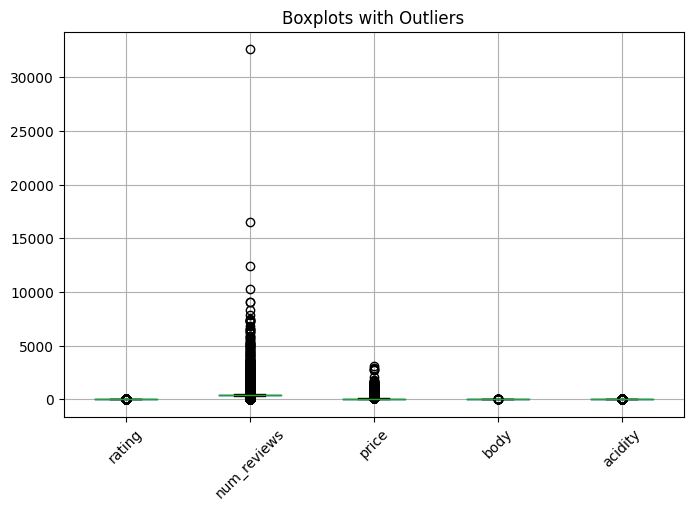

Shape: (7500, 11)
The type column is categorical and has 2 unique values.
The free sulfur dioxide column has outliers, and the rate of outliers is: 0.95%
The total sulfur dioxide column has outliers, and the rate of outliers is: 0.15%
The density column has outliers, and the rate of outliers is: 0.05%
The alcohol column has outliers, and the rate of outliers is: 0.05%
The quality column has outliers, and the rate of outliers is: 3.51%


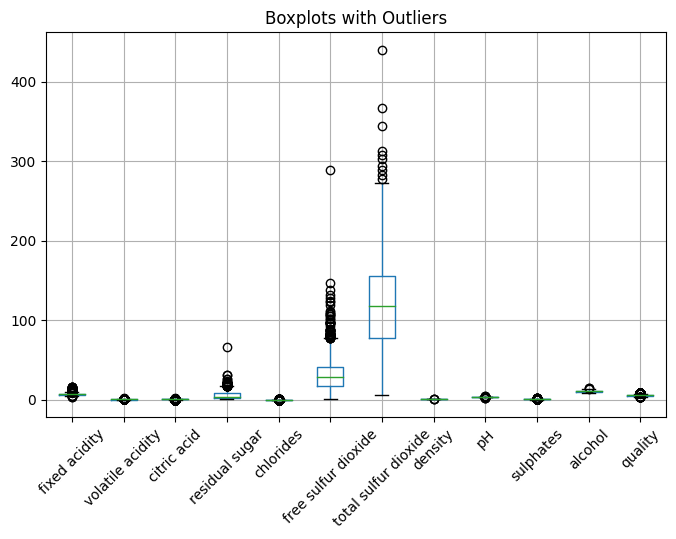

Shape: (6497, 13)


In [ ]:
IQR(train, plot_boxplots)
IQR(train2, plot_boxplots)

When observing the outliers in the two datasets, we first notice that Dataset 1 has a significant number of outliers, especially considering its abundance of categorical values.

On the other hand, Dataset 2, unequivocally, does not exhibit many outliers. Thus, by either removing them or employing effective normalization, we may not adversely affect the model.

Given the presence of outliers in the datasets, careful consideration must be given to the choice of the model to adequately address our problem.

After visualizing outliers and missing values, we will attempt to visualize this information again, particularly after transforming categorical variables into quantitative variables. This will also provide an opportunity to examine different correlations.

We will now proceed to the data preparation phase, where we will ready our data for usability within the model, aiming for optimal performance. Tasks include Newton interpolation, pre-processing of outlier values, among others.

## Data Preparation

In [ ]:
def onehot_tranform(dataset):
  """
  Using one hot encoding on categorical dataset
  """
  cat_data = dataset.select_dtypes(include="object")
  cat_data = pd.get_dummies(cat_data)
  return cat_data


def label_transform(dataset, variable, classes=False):
  """
  Use labelEncoder to Encode cat variable
  It's better to use it for target y
  """
  x = 0 #initialize variable
  le = LabelEncoder()
  x = le.fit_transform(dataset[variable])
  if classes == True:
    print("Classes convert are: {}".format(le.classes_))
  elif classes == False:
    return x
  else:
    print("Classes need to be boolean")
    return x

In [ ]:
def newton_interpolation(dataset):
    """
    Interpolate missing values in the dataset using Newton interpolation.
    """

    # Copy the dataset to avoid modifying the original
    interpolated_dataset = dataset.copy()

    # Iterate over columns
    for col in interpolated_dataset.columns:
        # Check if the column contains numeric data
        if pd.api.types.is_numeric_dtype(interpolated_dataset[col]):
            # Identify missing values
            missing_values = interpolated_dataset[col].isnull()

            # Create an array of indices for non-missing values
            non_missing_indices = np.arange(len(interpolated_dataset[col]))[~missing_values]

            # Use Newton's interpolation formula to fill missing values
            interpolated_dataset[col][missing_values] = np.interp(
                np.arange(len(interpolated_dataset[col]))[missing_values],
                non_missing_indices,
                interpolated_dataset[col][non_missing_indices],
                left=np.nan,
                right=np.nan
            )

    return interpolated_dataset


  ```Analyzis about the 2 datasets:```

We need to pause and reflect on how we will handle these two datasets. Although they allow us to address similar use cases, they are clearly two completely different datasets. Taking two different datasets and establishing a relationship between all the features and the target variable will lead to a biased approach. Here's the explanation:

The first dataset has more 7500 observations and 11 columns, while the second one has about 6500 observations and 13 columns. However, the key difference lies in the information they contain. In the first dataset, there is a 'type' column, which is also present in the second dataset. However, the first one is more detailed as it includes information on 20 types or brands of wines.

The second dataset only contains 2 types of wines. Therefore, combining this information is not straightforward. The wine quality in the second dataset ranges from 3 to 9, and this information is not present in the first dataset.

We consulted with an oenologist, Ms. Davenel, at Toulon, to gain a better understanding of the datasets and to assimilate the domain knowledge. According to her, the first dataset represents wines based on regions, wine brands, and their prices. On the other hand, the second dataset shows the chemical composition of red and white wines. The presented wine brands are also considered low and mid-range.

For the final argument against combining these datasets, in the second dataset, we have only red and white wines, whereas the different wine brands presented can be red, white, or rosé.

Concatenating them would not be the best decision. However, to improve the scope of our model, we can use relevant variables such as:

- Prices
- Types
- Wines
- Region

To be more precise and open up more scenarios, we can identify high-quality wines by region, for example.

We will focus on dataset 2 and perform a separate preparation for the combined datasets.



**1st case(Only the second dataset)**

In [ ]:
train2["type"]

0       white
1       white
2       white
3       white
4       white
        ...  
6492      red
6493      red
6494      red
6495      red
6496      red
Name: type, Length: 6497, dtype: object

In [ ]:
train2["type"] = label_transform(train2, "type")
train2["type"]

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: type, Length: 6497, dtype: int64

In [ ]:
train2_prime = newton_interpolation(train2)
train2_prime.isna().value_counts()

<ipython-input-24-265079602f57>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated_dataset[col][missing_values] = np.interp(
<ipython-input-24-265079602f57>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated_dataset[col][missing_values] = np.interp(
<ipython-input-24-265079602f57>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  interpolated_dataset[col][missing_values] = np.interp(
<ipython-input-24-265079602f

type   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH     sulphates  alcohol  quality
False  False          False             False        False           False      False                False                 False    False  False      False    False      6497
dtype: int64

In [ ]:
y = train2_prime["type"] #classification case
y_prime = train2_prime["quality"] #regression case
X = train2_prime.drop("type", axis=1)
X_prime = train2_prime.drop("quality", axis=1)
print("X and y are ready...")

X and y are ready...


**2nd case(combine the 2 datasets)**

In [ ]:
train_prime = train[:len(train2)]
train_prime

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
6492,Matsu,El Viejo,2019,4.2,400,Espana,Toro,27.89,Toro Red,NaN,NaN
6493,Artadi,Valdegines,2016,4.2,398,Espana,Vino de Espana,48.96,Tempranillo,NaN,NaN
6494,Contino,Rioja Graciano,2011,4.2,395,Espana,Rioja,61.94,Rioja Red,NaN,NaN
6495,Contino,Reserva,2016,4.2,392,Espana,Rioja,19.98,Rioja Red,NaN,NaN


Now first data and the 2nd have the same shape.

In [ ]:
cat_data = onehot_tranform(train_prime)
cat_data.head()

,winery_A Coroa,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,winery_Adama Wines,winery_Adega Familiar Eladio Pineiro,winery_Agusti Torello Mata,...,type_Ribera Del Duero Red,type_Rioja Red,type_Rioja White,type_Sauvignon Blanc,type_Sherry,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
num_data = train_prime.select_dtypes(exclude="object")
print("Columns : \n{}".format(num_data.columns))

Columns : 
Index(['rating', 'num_reviews', 'price', 'body', 'acidity'], dtype='object')


In [ ]:
X_w = pd.concat([cat_data, num_data], axis=1)
X_w

,winery_A Coroa,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,winery_Adama Wines,winery_Adega Familiar Eladio Pineiro,winery_Agusti Torello Mata,...,type_Sparkling,type_Syrah,type_Tempranillo,type_Toro Red,type_Verdejo,rating,num_reviews,price,body,acidity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4.9,58,995.00,5.0,3.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,4.9,31,313.50,4.0,2.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.8,1793,324.95,5.0,3.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.8,1705,692.96,5.0,3.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.8,1309,778.06,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,4.2,400,27.89,NaN,NaN
6493,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,4.2,398,48.96,NaN,NaN
6494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.2,395,61.94,NaN,NaN
6495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4.2,392,19.98,NaN,NaN


We performed one-hot encoding and associated the resulting columns with the columns from the training set. We only took the numeric columns because one-hot encoding was applied to all categorical columns.

Now concat the first data with the second data.

In [ ]:
train_second = pd.concat([X_w, train2_prime], axis=1)
train_second = train_second.dropna(axis=0)
train_second

,winery_A Coroa,winery_AGE,winery_Aalto,winery_Abadal,winery_Abadia Retuerta,winery_Abel Mendoza Monge,winery_Acustic Celler,winery_Adama Wines,winery_Adega Familiar Eladio Pineiro,winery_Agusti Torello Mata,...,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,0,0,0,0,0,0,0,0,0,...,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,0,0,0,0,0,0,0,0,0,0,...,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,0,0,0,0,0,0,0,0,0,0,...,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,0,0,0,0,0,0,0,0,0,0,...,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,0,0,0,0,0,0,0,0,0,0,...,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6470,0,0,0,0,0,0,0,0,0,0,...,0.32,2.2,0.069,35.0,104.0,0.99632,3.33,0.51,9.5,5
6471,0,0,0,0,0,0,0,0,0,0,...,0.20,2.4,0.075,15.0,50.0,0.99467,3.58,0.67,12.5,6
6472,0,0,0,0,0,0,0,0,0,0,...,0.78,13.9,0.074,23.0,92.0,0.99677,3.39,0.48,10.5,6
6473,0,0,0,0,0,0,0,0,0,0,...,0.40,2.2,0.060,12.0,20.0,0.99474,3.26,0.64,11.8,6


In [ ]:
y_y = train_second["type"] #classification case
y_y_prime = train_second["quality"] #regression case
X_x = train_second.drop("type", axis=1)
X_x_prime = train_second.drop("quality", axis=1)
print("Done!")

Done!


In [ ]:
def split(X,y, shuffle = True):
  """
  Split data to train and test
  """
  x_train, x_valid, y_train, y_valid = train_test_split(X,y,
                                                        train_size=.8,
                                                        random_state=123,
                                                        shuffle = shuffle)
  return x_train, x_valid, y_train, y_valid


#Split data for classification
x_train1c, x_valid1c, y_train1c, y_valid1c = split(X,y)
x_train2c, x_valid2c, y_train2c, y_valid2c = split(X_x, y_y)

#split for regression
x_train1r, x_valid1r, y_train1r, y_valid1r = split(X_prime,y_prime)
x_train2r, x_valid2r, y_train2r, y_valid2r = split(X_x_prime, y_y_prime)

In [ ]:
# check that the dimensions of our train and test sets are okay
print(x_train1c.shape)
print(y_train1c.shape)
print(x_valid1c.shape)
print(y_valid1c.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [ ]:
# check that the dimensions of our train and test sets are okay
print(x_train2r.shape)
print(y_train2r.shape)
print(x_valid2r.shape)
print(y_valid2r.shape)

(4347, 1513)
(4347,)
(1087, 1513)
(1087,)


```Conclusion:```

We prepared a total of two scenarios.
1. The first scenario is specifically for the train2 dataset since it focuses on the chemical characteristics of the wines.
2. The second scenario combines both datasets, as the first one provides a different perspective and contains valuable variables.

Now, let's move on to the modeling phase.

## Modeling

The data is already prepared, so it's time to build the model, taking into account:
* Outliers
* The complexity of the data due to its size (4347, 1513)
* Interpolated values

We will use a model suitable for this scenario: eXtreme Gradient Boosting (XGBoost).

XGBoost is a scalable and enhanced version of the gradient boosting algorithm designed for efficiency, computational speed, and model performance. It is an open-source library and part of the Distributed Machine Learning Community. XGBoost is a perfect combination of software and hardware capabilities designed to enhance existing boosting techniques with accuracy in the shortest amount of time.

XGBoost is a sequential ensemble model. It defaults to using a random forest of trees, where each tree corrects the error of the previous tree using gradient descent.

Let's detail the workings of the algorithm behind this model. Consider an initial weak classifier $f_0$. After optimizing it, the boosting method seeks to build a new weak classifier $f_1$ from $f_0$ by introducing a residual term $h$:
<br>
$$f_1(x) = f_0(x) + h(x)$$
<br>
So that $f_1$ is more performant than $f_0$. By repeating the operation a certain number of times, say p, we build a final complex classifier $F$, which is a linear combination of the $f_i$, where each $f_i$ is associated with a weight $\alpha_i$:
<br>
$$F(x) = \sum_{i=0}^{n} α_i \times f_i(x)$$
<br>
Gradient Boosting is a particularly powerful technique when the loss function (measure of the difference between theoretical and predicted values) is differentiable (which is our case for a quadratic loss function).
(Here, we calculate pseudo-residues)
<br>
$$r_{i,m} = \frac{\partial L(y_i, f_{m-1}(x_i))}{\partial f_{m-1}(x_i)}$$
<br>
These pseudo-residues are actually used to get as close as possible to the optimal solution. The interest of the new model is to capture the observations that have not been correctly predicted by the previous classifiers.
<br>
$$\gamma_m = argmin_\gamma \times \sum_{i=1}^{n}L(y_i, f_m-1(x_i)+\gamma h_m(x_i))$$
<br>
And update the model: <br>
$$f_m(x) = f_m-1(x) + η\gamma_mh_m(x)$$ <br>

<br>
$$\eta$$ is the learning rate, which helps prevent potential overfitting (regularization principle).

**Classification**

In [ ]:
params = {
    'num_rounds':        120,
    'max_depth':         8,
    'max_leaves':        2**8,
    'alpha':             0.9,
    'eta':               0.1,
    'gamma':             0.1,
    'learning_rate':     0.1,
    'subsample':         1,
    'reg_lambda':        1,
    'scale_pos_weight':  2,
    'n_gpus':            1,
    'objective':         'binary:logistic',
    'verbose':           True
}

A **DMatrix** is a data structure specific to XGBoost used to store training and testing data efficiently, especially when working with large datasets. It is employed to represent the data matrix in the internally optimized format for XGBoost, providing performance benefits.

In [ ]:
def prepare_dmatrix(x_train, x_valid, y_train, y_valid) -> Tuple[xgb.DMatrix, xgb.DMatrix, List[Tuple[xgb.DMatrix, str]]]:
    dtrain = xgb.DMatrix(x_train, label=y_train)
    dvalid = xgb.DMatrix(x_valid, label=y_valid)
    evals = [(dvalid, 'valid'), (dtrain, 'train')]
    return dtrain, dvalid, evals

def accuracy_classification(valid, y_true, model, threshold=0.5):
    """
    Calculate accuracy for binary classification.
    """
    y_hat = model.predict(valid)
    y_hat_labels = (y_hat > threshold).astype(int)
    accuracy = accuracy_score(y_true, y_hat_labels)
    return accuracy, y_hat, y_hat_labels

In [ ]:
#prepare dmatrix for classification
dtrain1c, dvalid1c, evals1c = prepare_dmatrix(x_train1c, x_valid1c, y_train1c, y_valid1c)
dtrain2c, dvalid2c, evals2c = prepare_dmatrix(x_train2c, x_valid2c, y_train2c, y_valid2c)

In [ ]:
num_rounds = params['num_rounds']

In [ ]:
model_classification1 = xgb.train(params, dtrain1c, num_rounds, evals=evals1c, verbose_eval=20)

[0]	valid-logloss:0.44530	train-logloss:0.46388


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:19:30] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "num_rounds", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[20]	valid-logloss:0.07556	train-logloss:0.05861
[40]	valid-logloss:0.03630	train-logloss:0.01698
[60]	valid-logloss:0.02648	train-logloss:0.00827
[80]	valid-logloss:0.02229	train-logloss:0.00547
[100]	valid-logloss:0.02092	train-logloss:0.00441
[119]	valid-logloss:0.02075	train-logloss:0.00430


In [ ]:
model_classification2 = xgb.train(params, dtrain2c, num_rounds, evals=evals2c, verbose_eval=20)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:19:33] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "num_rounds", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	valid-logloss:0.43355	train-logloss:0.44177
[20]	valid-logloss:0.06659	train-logloss:0.05523
[40]	valid-logloss:0.02732	train-logloss:0.01543
[60]	valid-logloss:0.01859	train-logloss:0.00730
[80]	valid-logloss:0.01618	train-logloss:0.00490
[100]	valid-logloss:0.01542	train-logloss:0.00377
[119]	valid-logloss:0.01489	train-logloss:0.00349


In [ ]:
acc1, yh1, yhl1 = accuracy_classification(dvalid1c, y_valid1c, model_classification1)
acc2, yh2, yhl2 = accuracy_classification(dvalid2c, y_valid2c, model_classification2)
print(f'Accuracy of the 1st case: {acc1 * 100:.2f}%')
print(f'Accuracy of the 2nd case: {acc2 * 100:.2f}%')

Accuracy of the 1st case: 99.23%
Accuracy of the 2nd case: 99.54%


**Regression**

In [ ]:
params_regression = {
    'num_rounds':        100,
    'max_depth':         8,
    'max_leaves':        2**8,
    'alpha':             0.9,
    'eta':               0.1,
    'gamma':             0.1,
    'learning_rate':     0.1,
    'subsample':         1,
    'reg_lambda':        1,
    'n_gpus':            1,
    'objective':         'reg:squarederror',
    'verbose':           True
}

num_rounds_regression = params_regression['num_rounds']

In [ ]:
def mse_regression(valid, y_true, model):
    """
    Calculate Mean Squared Error (MSE) for regression.
    """
    y_hat = model.predict(valid)
    mse = mean_squared_error(y_true, y_hat)
    return mse, y_hat

In [ ]:
#prepare dmatrix for regression
dtrain1r, dvalid1r, evals1r = prepare_dmatrix(x_train1r, x_valid1r, y_train1r, y_valid1r)
dtrain2r, dvalid2r, evals2r = prepare_dmatrix(x_train2r, x_valid2r, y_train2r, y_valid2r)

In [ ]:
model_regression1 = xgb.train(params_regression, dtrain1r, num_rounds_regression, evals=evals1r, verbose_eval=20)

[0]	valid-rmse:0.83725	train-rmse:0.83277
[20]	valid-rmse:0.66664	train-rmse:0.50816
[40]	valid-rmse:0.64635	train-rmse:0.43313


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:19:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "num_rounds", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[60]	valid-rmse:0.63646	train-rmse:0.39098
[80]	valid-rmse:0.63076	train-rmse:0.36605
[99]	valid-rmse:0.63076	train-rmse:0.36605


In [ ]:
model_regression2 = xgb.train(params_regression, dtrain2r, num_rounds_regression, evals=evals2r, verbose_eval=20)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [19:19:46] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "n_gpus", "num_rounds", "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[0]	valid-rmse:0.85359	train-rmse:0.83660
[20]	valid-rmse:0.66999	train-rmse:0.49853
[40]	valid-rmse:0.65376	train-rmse:0.41465
[60]	valid-rmse:0.64712	train-rmse:0.37438
[80]	valid-rmse:0.64223	train-rmse:0.33223
[99]	valid-rmse:0.64223	train-rmse:0.33223


In [ ]:
mse_value1, predictions1 = mse_regression(dvalid1r, y_valid1r, model_regression1)
mse_value2, predictions2 = mse_regression(dvalid2r, y_valid2r, model_regression2)
print(f'Mean Squared Error of the 1st case: {mse_value1}')
print(f'Mean Squared Error of the 2nd case: {mse_value2}')

Mean Squared Error of the 1st case: 0.39785776125856953
Mean Squared Error of the 2nd case: 0.4124654540088728


## Evaluation

In this step, we will evaluate the performance of our model, which is crucial for assessing its effectiveness.

**Classification Evaluation Metrics:**
For the classification case, we will utilize various metrics such as Precision, Recall, F1-Score.

- **Precision:** It measures the accuracy of positive predictions and is calculated as the ratio of true positive predictions to the total predicted positives.

- **Recall (Sensitivity):** It assesses the ability of the model to capture all the actual positive instances and is calculated as the ratio of true positives to the total actual positives.

- **F1-Score:** It is the harmonic mean of Precision and Recall and provides a balance between precision and recall.

**Regression Evaluation Metrics:**
For the regression case, we will consider metrics like MAE (Mean Absolute Error), MSE (Mean Squared Error), and RMSE (Root Mean Squared Error).

- **MAE (Mean Absolute Error):** It calculates the average absolute differences between predicted and actual values.

- **MSE (Mean Squared Error):** It computes the average squared differences between predicted and actual values.

- **RMSE (Root Mean Squared Error):** It is the square root of the MSE and provides a measure of the average magnitude of errors.

These metrics will provide a comprehensive assessment of the model's performance in both classification and regression scenarios. They help us understand the precision, recall, and accuracy for classification, as well as the accuracy and precision of predicted values for regression.

**Classification**

In [ ]:
def plot_confusion_matrix(cm, target_names, title='Confusion Matrix', cmap=plt.cm.Greens):
    """
    Confusion matrix for binary classes
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
    plt.tight_layout()

    width, height = cm.shape

    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')


def plot_feature_importance(model, max_num_features=10):
    """
    Plot the feature importance of an XGBoost model.
    """
    # Plot feature importance
    xgb.plot_importance(model, max_num_features=max_num_features)
    plt.show()

In [ ]:
def plot_roc_curve(y_true, y_scores, model_name='Model'):
    """
    Plot ROC curve for binary classification.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc='lower right')
    plt.show()

Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       301
           1       0.99      1.00      1.00       999

    accuracy                           0.99      1300
   macro avg       0.99      0.99      0.99      1300
weighted avg       0.99      0.99      0.99      1300



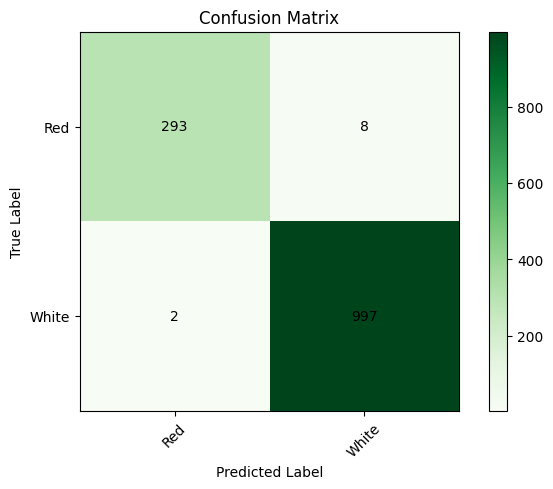

In [ ]:
results1c = confusion_matrix(y_valid1c, yhl1)
print ('Classification Report :')
plot_confusion_matrix(results1c, ['Red','White'])
print(classification_report(y_valid1c, yhl1))

Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       240
           1       0.99      1.00      1.00       847

    accuracy                           1.00      1087
   macro avg       1.00      0.99      0.99      1087
weighted avg       1.00      1.00      1.00      1087



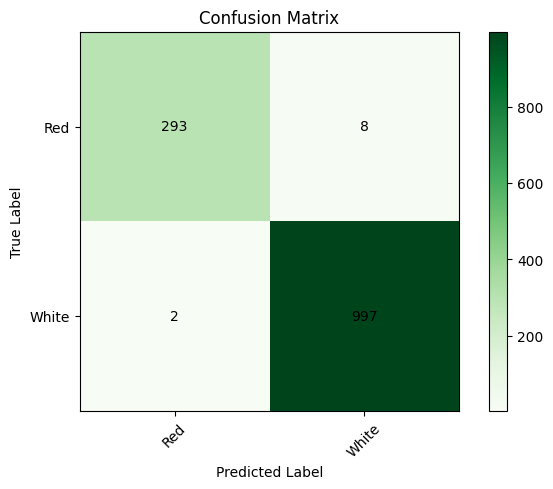

In [ ]:
results2c = confusion_matrix(y_valid2c, yhl2)
print ('Classification Report :')
plot_confusion_matrix(results1c, ['Red','White'])
print(classification_report(y_valid2c, yhl2))

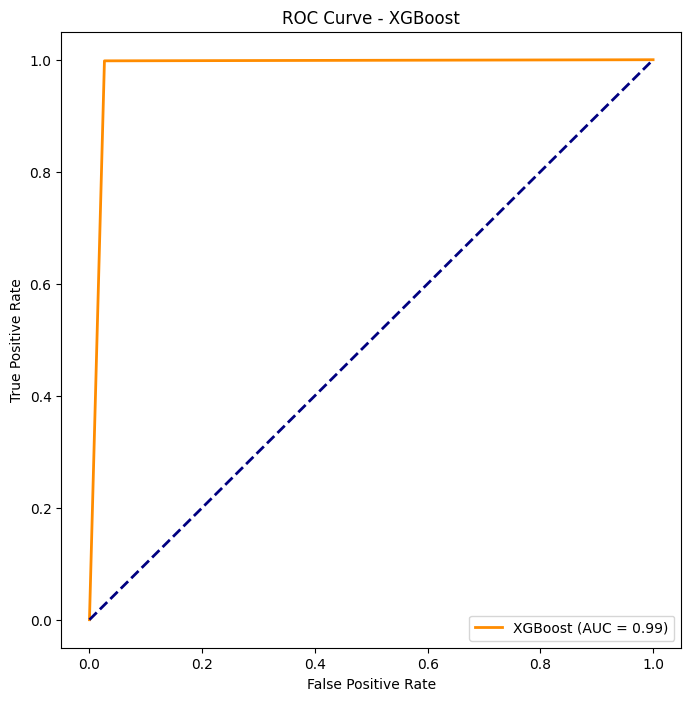

In [ ]:
plot_roc_curve(y_valid1c, yhl1, model_name='XGBoost')

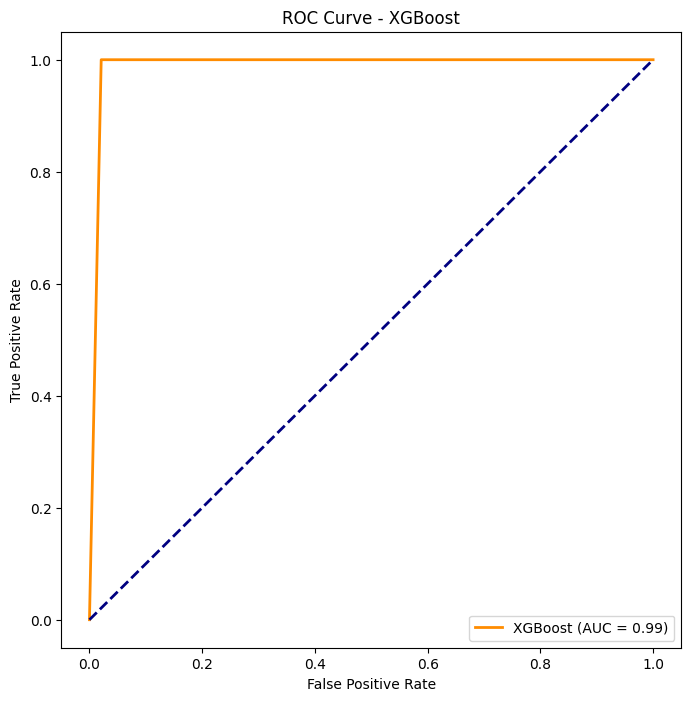

In [ ]:
plot_roc_curve(y_valid2c, yhl2, model_name='XGBoost')

1st case


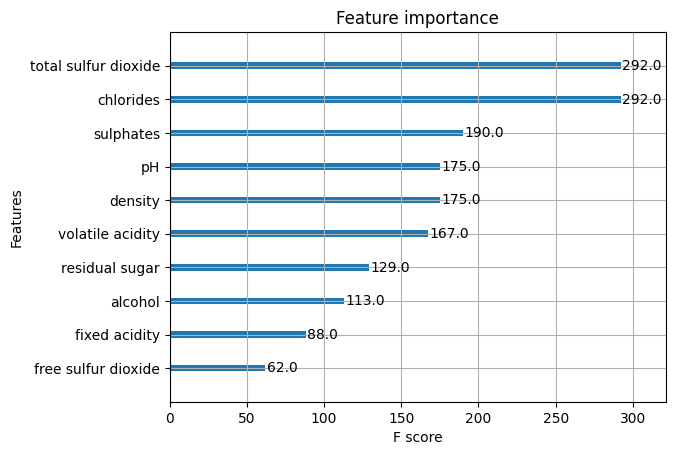

2nd case


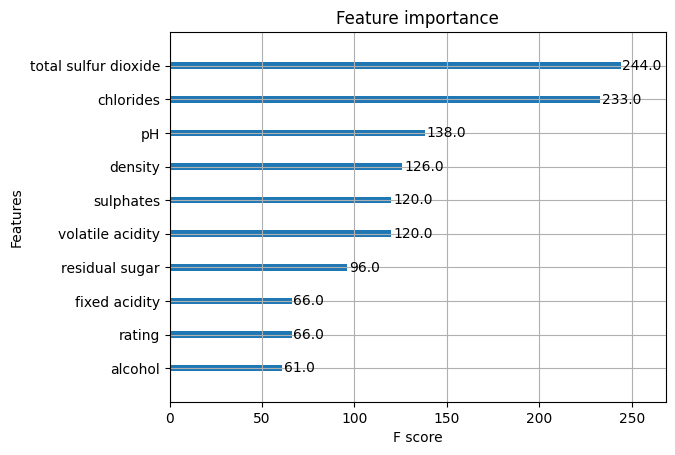

In [ ]:
print("1st case")
plot_feature_importance(model_classification1)
print("2nd case")
plot_feature_importance(model_classification2)

Above, we visualize the variables that are important for the type of wine.

**Regression**

In [ ]:
def evaluate_regression_model(model, X, y_true):
    """
    Evaluate a regression model.
    """
    # Make predictions
    y_pred = model.predict(X)

    # Calculate metrics
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    mae = mean_absolute_error(y_true, y_pred)

    return mse, rmse, mae


def plot_feature_importance(model, max_num_features=10):
    """
    Plot the feature importance of an XGBoost model.
    """
    # Plot feature importance
    xgb.plot_importance(model, max_num_features=max_num_features)
    plt.show()

In [ ]:
mse, rmse, mae = evaluate_regression_model(model_regression1, dvalid1r, y_valid1r)
mse2, rmse2, mae2 = evaluate_regression_model(model_regression2, dvalid2r, y_valid2r)
print("Evaluate the regression model. (For the 2 cases)")
print("First case: only the 2nd dataset | Second case: Concatenate the 2 datasets: \n")
print("MSE 1: {} | MSE 2: {}".format(mse, mse2))
print("RMSE 1: {} | RMSE 2: {}".format(rmse, rmse2))
print("MAE 1: {} | MAE 2: {}".format(mae, mae2))

Evaluate the regression model. (For the 2 cases)
First case: only the 2nd dataset | Second case: Concatenate the 2 datasets: 

MSE 1: 0.39785776125856953 | MSE 2: 0.4124654540088728
RMSE 1: 0.6307596699683403 | RMSE 2: 0.6422347343525362
MAE 1: 0.4578863694117619 | MAE 2: 0.49148518905358896


```Interpretation:```

MSE: The MSE represents the average squared difference between predicted and actual values. In both cases, lower MSE values indicate better model performance. The first case has a slightly lower MSE, suggesting better accuracy when using only the 2nd dataset.

RMSE: The RMSE is the square root of the MSE, providing a measure of the average magnitude of errors. Similar to MSE, lower RMSE values are preferred. Again, the first case has a slightly lower RMSE.

MAE: The MAE represents the average absolute difference between predicted and actual values. It is less sensitive to outliers than MSE. The first case shows a lower MAE, indicating better accuracy in predicting absolute differences.

In summary, based on these metrics, the model performs slightly better when trained solely on the 2nd dataset compared to the case where both datasets are concatenated. These metrics provide insights into the accuracy and precision of the regression model in predicting the target variable.

On visualise ici les variables importantes ayant un impact significatif sur la qualite du vin

1st case


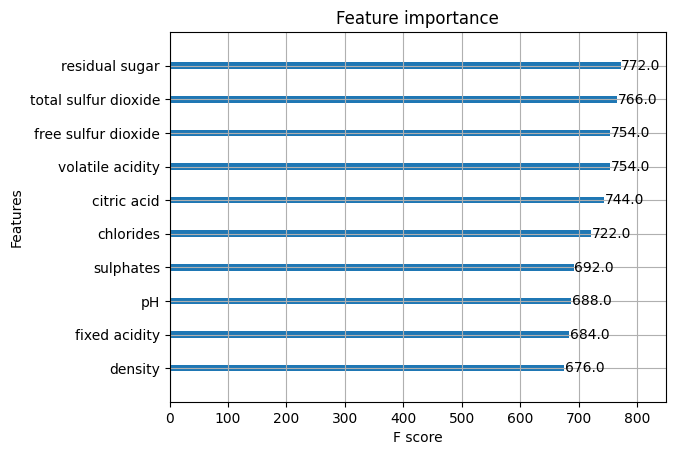

2nd case


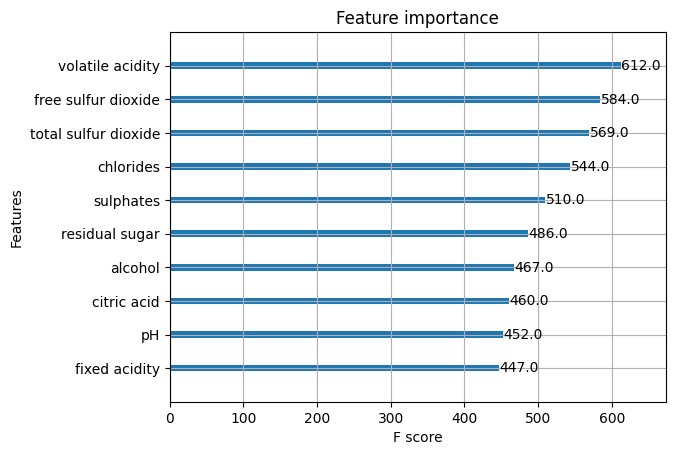

In [ ]:
print("1st case")
plot_feature_importance(model_regression1)
print("2nd case")
plot_feature_importance(model_regression2)

The higher the F score, the more influence a feature has on the model's decision-making process. It is calculated based on the number of times a feature is used to split the data across all the trees in the model and the improvement to the model's performance achieved by each split.

# Deployment

The model will be deployed via a web or desktop interface along with the other models.

Save the models for integration into an interface.

In [ ]:
# Save the classification model
with open('model_classification1.pkl', 'wb') as file:
    pickle.dump(model_classification1, file)
with open('model_classification2.pkl', 'wb') as file:
    pickle.dump(model_classification2, file)

# Save the regression model
with open('model_regression1.pkl', 'wb') as file:
    pickle.dump(model_regression1, file)
with open('model_regression2.pkl', 'wb') as file:
    pickle.dump(model_regression2, file)

print("The 4 models save.")

The 4 models save.
